

# Réseaux de neurones en graphes

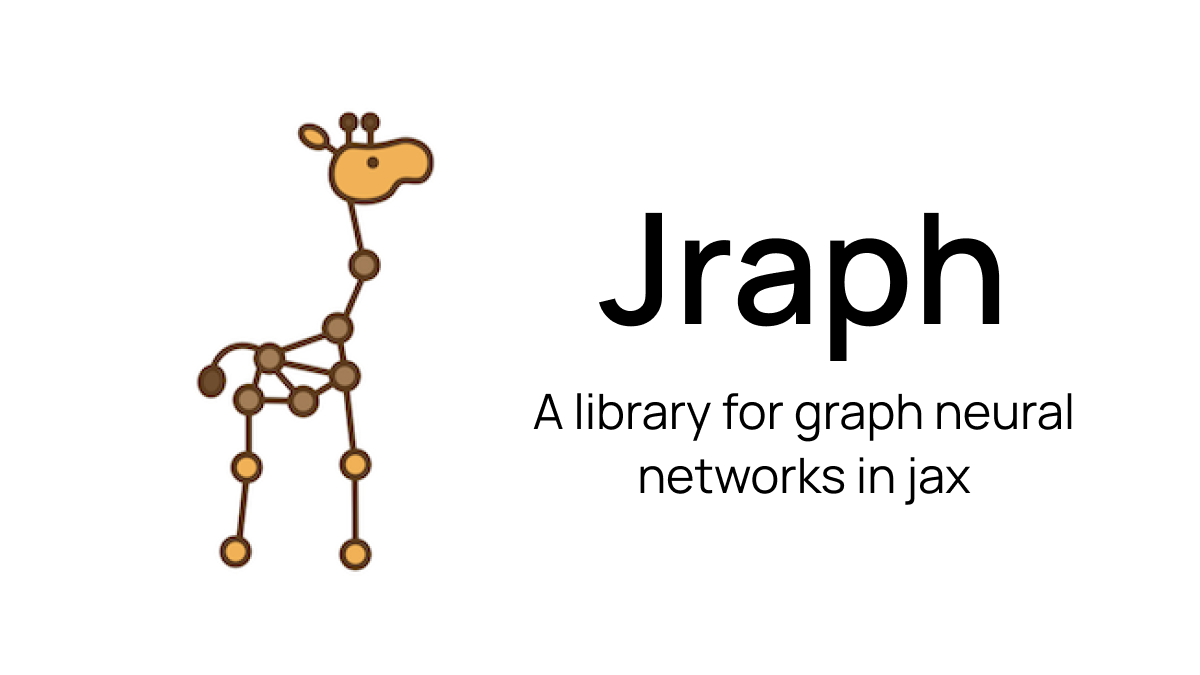

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Graph_Neural_Networks/Graph_Neural_Networks_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.

**Auteurs:**
Matthew Morris et Marianne Abemgnigni.

Crédit à Lisa Wang et Nikola Jovanović pour avoir fourni une grande partie du [contenu de base](https://github.com/deepmind/educational/blob/master/colabs/summer_schools/intro_to_graph_nets_tutorial_with_jraph.ipynb).

**Introduction:**

Bienvenue! Ravi de vous avoir ici, à la conférence Deep Learning Indaba de cette année !

Ce tutoriel porte sur les réseaux de neurones en graphes (Graph Neural Networks en anglais, ou tout simplement GNNs), un sujet qui a explosé en popularité tant dans la recherche que dans l'industrie. Nous commencerons par une révision de la théorie des graphes, puis nous plongerons dans le fonctionnement des GNNs à un niveau général. Ensuite, nous couvrirons quelques implémentations populaires de GNNs et verrons comment elles fonctionnent en pratique.

Ceci est la version principale du notebook : veuillez consulter le répertoire GitHub si vous souhaitez vous exercer à la version étendue.

**Sujets:**

Contenu: <font color='blue'>`Réseaux de Neurones en Graphes`</font>

Niveau: <font color='blue'>`Avancé`</font>


**Objectifs/Compétences à acquérir:**
- Comprendre la théorie des graphes et des GNNs
- Implémenter des GCNs

**Objectifs de l'extension (non abordés dans cette version du notebook):**
- Implémenter des GATs
- Voir des applications sur différents jeux de données

**Pré-requis:**

- Une certaine familiarité avec Jax (nous utiliserons `jraph`)
- Notions de base sur les réseaux de neurones
- Notions de base en théorie des graphes (voir les [diapositives](https://ocw.mit.edu/courses/1-022-introduction-to-network-models-fall-2018/resources/mit1_022f18_lec2/) par Amir Ajorlou)

Nous recommandons de visionner le [cours vidéo sur les Fondements Théoriques des Réseaux Neuronaux de Graphes](https://www.youtube.com/watch?v=uF53xsT7mjc&) par Petar Veličković avant de participer à ce tutoriel. Ledit cours offre une introduction théorique aux réseaux neuronaux de graphes (GNNs), un contexte historique et des exemples motivants.

**Travail complémentaire :**
Si cela vous a intéressé, nous recommandons ce [cours](https://web.stanford.edu/class/cs224w/) qui couvre les GNNs en profondeur.

**Plan principal :**

1. Révision de la théorie des graphes, bibliothèque networkx
2. Introduction à la bibliothèque `jraph`
3. Théorie des Réseaux de Neurones en Graphes
4. Mises à jour locales sur les nœuds
5. Agrégation de voisinage
6. Réseaux convolutifs pour graphes (GCN)

**Plan des extensions (non abordés dans cette version du notebook):**

1. Réseaux d'attention graphiques (GAT)
2. Classification de Graphes sur MUTAG (Molécules)
3. Prédiction de Liens sur CORA (Réseau de Citations)

**Avant de commencer :**

1. **Important** : Si vous prévoyez d'exécuter ce code hors ligne pendant Indaba, veuillez vous rendre dans la section "Configuration" et exécuter les cellules de code pour vous assurer qu'elles s'exécutent sans erreurs.

2. Pour cette partie pratique, vous pouvez utiliser un GPU pour accélérer l'entraînement. Cependant, ce n'est pas nécessaire : ce notebook fonctionnera sans encombre sur CPU. Pour ce faire, allez dans le menu "Runtime" dans Colab, sélectionnez "Change runtime type" et dans la fenêtre qui va s'afficher, choisissez "GPU" dans la case "Hardware accelerator".

## Plan

>[Réseaux de Neurones en Graphes](#scrollTo=jjjb31bpM8-i)

>>[Plan](#scrollTo=51TEXn_OI4Ee)

>[Configuration](#scrollTo=X5YbGdwnxzvv)

>>[Téléchargements requis (exécutez cette cellule)](#scrollTo=Gn3M634bJYpJ)

>>[Téléchargements de jeux de données pour la partie extension](#scrollTo=LInlxoEvLeyI)

>>[Importations (exécutez cette cellule)](#scrollTo=5xwBO7RkJ3VI)

>[Introduction](#scrollTo=oNIUlTtXwMio)

>[Section 1 : Graphes, networkx](#scrollTo=EOoFe-B0yLu4)

>>[Révision des fondamentaux sur les graphes](#scrollTo=dLiatNhIyP33)

>>>[Question](#scrollTo=xKngMskSwPY6)

>>>[Réponse](#scrollTo=Z75ce6_IygaH)

>>[NetworkX](#scrollTo=l_qsZZCwTFeL)

>>[Tâche 1 : Définition de graphes](#scrollTo=lJPfTPTE1woQ)

>[Section 2 : Introduction à la bibliothèque jraph](#scrollTo=3C5YI9M0vwvb)

>>>[Représentation d'un graphe dans jraph](#scrollTo=3C5YI9M0vwvb)

>>[Inspection de GraphsTuple](#scrollTo=CnWGPulK_tYE)

>>[Visualisation du Graphe](#scrollTo=l3Pwh9e7d8gN)

>>[Tâche 2 : Création de GraphsTuple](#scrollTo=5d_y992K1u5Q)

>[Section 3 : Théorie des Réseaux de Neurones en Graphes](#scrollTo=WZpm6OM0L7Rc)

>>[Tâches de Prédiction de Graphes](#scrollTo=Kx49usOnSeBW)

>[Section 4 : Mise à jour des caractéristiques des nœuds de façon locale](#scrollTo=aQIneDxJPoCv)

>>[Implémenter une base MLP](#scrollTo=_IFdfAmSDROb)

>>[Vérifier les sorties de update_node_fn avec le bloc MLP](#scrollTo=-rQCaukgyOue)

>>[Tâche 3 : Fonctions de mise à jour arbitraires](#scrollTo=XTukImR1LhUC)

>[Section 5 : Agrégation de voisinage](#scrollTo=7fvDD35t3r_e)

>>[Invariance et Équivariance](#scrollTo=CLiZjQB-55hu)

>>[Tentative d'utilisation d'un MLP](#scrollTo=beOwEDQ2A_Q5)

>>[Multiplication par la Matrice d'Adjacence](#scrollTo=G_2hxRagKB2m)

>>[Quelques Formalités (Optionnel)](#scrollTo=Yt2mGWrvXhug)

>[Section 6 : Réseau de Neurones Convolutifs en Graphes (GCN)](#scrollTo=1sWwBdZ2wqi5)

>>[Ajouter une Normalisation Symétrique](#scrollTo=4RCGC0XbkjCV)

>>[Implémentation](#scrollTo=8fNEk9r-7m89)

>>[Ajouter des Auto-Arêtes au Graphe (Arêtes reliant un nœud à lui-même)](#scrollTo=nD1Qc7xK-SkI)

>>[Implémentation de la Couche GCN](#scrollTo=qdxzqrpbj-jZ)

>>>[Tester la Couche GCN Générale](#scrollTo=oKxcA6XAza33)

>>[Tâche 4 : Normalisation Asymétrique](#scrollTo=fvXd1mVlk1ET)

>>[Construire un Modèle GCN avec Plusieurs Couches](#scrollTo=lha8rbQ78l3S)

>>[Classification de Nœuds avec GCN sur le Jeu de Données Karate Club](#scrollTo=Z5t7kw7SE_h4)

>>>[Jeu de Données Karate Club de Zachary](#scrollTo=IQ_w2kkWoAq4)

>>>>[Optimisation du GCN pour la Tâche de Classification des Nœuds Karate Club](#scrollTo=IQ_w2kkWoAq4)

>>>>[Code de Chargement du Jeu de Données](#scrollTo=5SE5DQoXWQJR)

>>>>[Visualisation](#scrollTo=Pi2DQYzjngR8)

>>>[Implémentation GCN](#scrollTo=afMhKYScQvMp)

>>>[Tâche 5 : Entraînement d'un GCN Plus Profond](#scrollTo=c9PFLF24m9Tp)

>>>>[5a) GCN à 3 Couches](#scrollTo=fBAbrPz7XPCQ)

>>>>[5b) GCN à 5 Couches](#scrollTo=EqHh3t_aYKrk)

>[Conclusion](#scrollTo=aGaoXGp4Id0J)

>[Retour d'information](#scrollTo=lBjhlym8DW_K)


# Configuration
Exécutez les cellules suivantes pour installer les packages nécessaires.

## Téléchargements Requis (exécutez cette cellule)
Veuillez exécuter cette cellule avant de venir à Indaba si vous prévoyez d'utiliser ce code hors ligne.

In [ ]:
%%capture
!pip install git+https://github.com/deepmind/jraph.git
!pip install flax
!pip install dm-haiku
!pip install networkx

## Téléchargements des Jeux de Données pour la partie "Extension".
Veuillez également exécuter cette cellule si vous souhaitez utiliser ce code hors ligne, car elle téléchargera les jeux de données utilisés dans les extensions.

In [ ]:
import pickle

# Téléchargez la version jraph de MUTAG.
!wget -P /tmp/ https://storage.googleapis.com/dm-educational/assets/graph-nets/jraph_datasets/mutag.pickle
with open('/tmp/mutag.pickle', 'rb') as f:
  mutag_ds = pickle.load(f)

# Téléchargez la version jraph de Cora
!wget -P /tmp/ https://storage.googleapis.com/dm-educational/assets/graph-nets/jraph_datasets/cora.pickle
with open('/tmp/cora.pickle', 'rb') as f:
  cora_ds = pickle.load(f)

## Importations (exécutez cette cellule)
Veuillez vous assurer que cette cellule s'exécute sans erreur avant de venir à Indaba si vous prévoyez d'utiliser ce code hors ligne.

Si vous n'avez pas l'un des packages suivants installés localement, l'exécution échouera en renvoyant en message. Dans ce cas, assurez-vous d'installer les packages localement en utilisant un gestionnaire de packages Python comme `pip` ou `conda`.

In [ ]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import functools
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jax.tree_util as tree
import jraph
import flax
import haiku as hk
import optax
import pickle
import numpy as onp
import networkx as nx

from sklearn.metrics import roc_auc_score
from typing import Any, Callable, Dict, List, Optional, Tuple

# Introduction

Les graphes sont une représentation puissante et générale des données avec une large gamme d'applications. Vous avez probablement déjà vu certaines de ces applications, comme les réseaux sociaux. Une autre application populaire des graphes est la modélisation moléculaire.

Les molécules se prêtent naturellement à la représentation sous forme de graphes, où les atomes sont des nœuds et les liaisons covalentes sont des arêtes. Un exemple est la molécule de Citronellal, qui est utilisée pour donner à l'huile de citronnelle son parfum citronné distinctif, et illustrée ci-dessous.


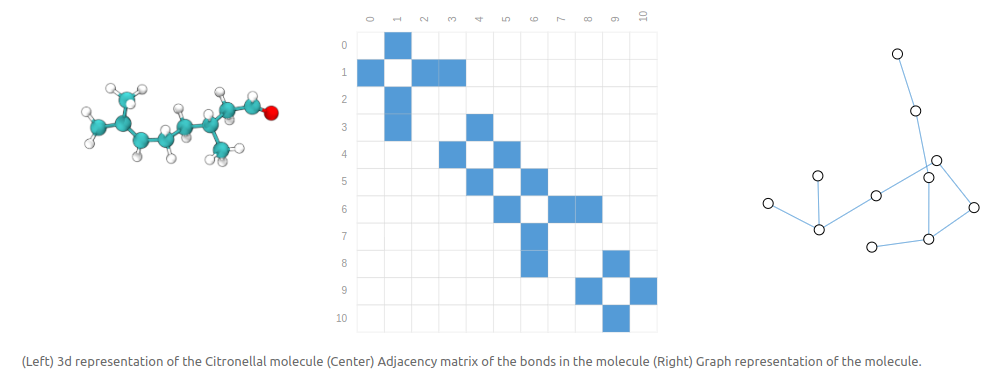


*Image source: [A Gentle Introduction to Graph Neural Networks](https://distill.pub/2021/gnn-intro/)*

Cet exemple illustre un aspect puissant des graphes : la structure de la molécule est explicitement encodée dans la représentation graphique elle-même. Par exemple, quels atomes sont connectés et comment ils sont connectés. En utilisant cette représentation graphique, nous pouvons accomplir une variété de tâches différentes. Par exemple, dans la découverte de médicaments, nous pouvons être intéressés à tester si différentes molécules se lient ensemble.

Il existe plusieurs autres applications des graphes qui pourraient vous surprendre, comme les images ! Une image peut être considérée comme un graphe avec une structure régulière, où chaque pixel est un nœud avec un vecteur tridimensionnel représentant la valeur RGB du pixel. D'autres exemples incluent les réseaux de citation de publications, où nous pouvons représenter chaque article comme un nœud et chaque arête comme une citation entre articles.

**Discussion en groupe :** *Quels autres exemples réels de graphes pouvez-vous imaginer ?*

Après avoir introduit les graphes, passons en revue les bases de la théorie des graphes.

# Section 1: Graphes, networkx

## Révision des fondamentaux des graphes

Un **graphe** est une paire $\mathsf{G} = (\mathsf{V}, \mathsf{E})$, où $\mathsf{V}$ est l'ensemble des $N$ **sommets** (nœuds), et $\mathsf{E}$ est l'ensemble des **arêtes** (liens) du graphe, c'est-à-dire des paires $(u,v)$ représentant une connexion entre deux sommets $u,v \in \mathsf{V}$. Un graphe **non orienté** est un graphe pour lequel $(u,v) \in \mathsf{E} \implies (v,u) \in \mathsf{E}$.

Il existe plusieurs façons de représenter $\mathsf{E}$ :
1. Comme une **Liste des arêtes** : une liste de paires $(u,v)$, où $(u,v)$ signifie qu'il y a une arête allant du nœud $u$ au nœud $v$.
2. Comme une **Matrice d'adjacence** : une matrice carrée binaire $A$ de taille $|\mathsf{V}| \times |\mathsf{V}|$, où $A_{u,v}=1$ si et seulement s'il existe une connexion entre les nœuds $u$ et $v$.
3. Comme une **Liste d'adjacence** : un tableau de $|\mathsf{V}|$ listes non ordonnées, où la $i$-ème liste correspond au $i$-ème nœud et contient tous les nœuds directement connectés au nœud $i$.

Exemple : Ci-dessous se trouve un graphe orienté avec quatre nœuds et cinq arêtes.

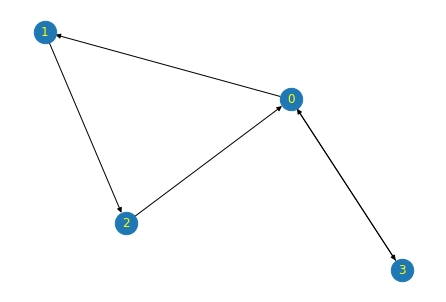

Les flèches sur les arêtes indiquent la direction de chaque arête, par exemple, il y a une arête allant du nœud 0 au nœud 1. Entre le nœud 0 et le nœud 3, il y a deux arêtes : une allant du nœud 0 au nœud 3 et une autre allant du nœud 3 au nœud 0.

Le nœud 0 a un degré sortant de 2, puisqu'il a deux arêtes sortantes, et un degré entrant de 2, puisqu'il a deux arêtes entrantes.

La liste des arêtes est :
$$[(0, 1), (0, 3), (1, 2), (2, 0), (3, 0)]$$

Comme Matrice d'adjacence:

$$\begin{array}{l|llll}
 source \setminus dest    & n_0 & n_1 & n_2 & n_3 \\ \hline
n_0 & 0    & 1    & 0    & 1    \\
n_1 & 0    & 0    & 1    & 0    \\
n_2 & 1    & 0    & 0    & 0    \\
n_3 & 1    & 0    & 0    & 0
\end{array}$$

Comme Liste d'adjacence:

$$[\{1, 3\}, \{2\}, \{0\}, \{0\}]$$



### Question
Quelle est la matrice d'adjacence pour le graphe suivant?

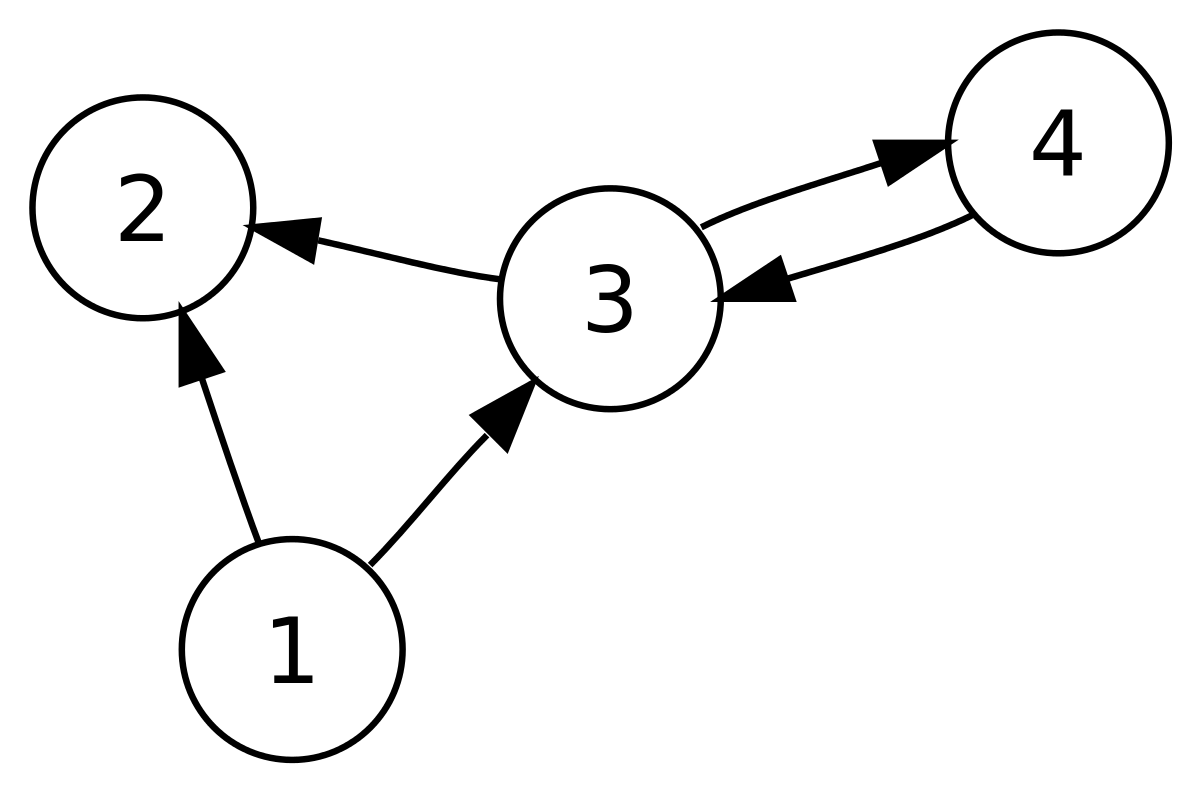

### Réponse

$$\begin{array}{l|llll}
 source \setminus dest    & n_1 & n_2 & n_3 & n_4 \\ \hline
n_1 & 0    & 1    & 1    & 0    \\
n_2 & 0    & 0    & 0    & 0    \\
n_3 & 0    & 1    & 0    & 1    \\
n_4 & 0    & 0    & 1    & 0
\end{array}$$

## NetworkX





NetworkX est une bibliothèque Python axée sur les graphes et les réseaux, offrant un grand nombre de méthodes utiles, y compris la visualisation que nous utiliserons plusieurs fois dans ce colab.

Créons et dessinons un graphe simple. Remarquez qu'il est non orienté.

In [ ]:
# Céez un graphe simple
G = nx.Graph() # Utilisez `DiGraph` pour les graphes orientés.

G.add_nodes_from([0, 2, 4, 5, 6]) # Remplissez la liste des étiquettes de nœuds en tant qu'entiers.
G.add_edges_from([(0, 2), (0, 4), (4, 5), (5, 6), (0, 5)]) # Remplissez la liste des paires de nœuds [(nœud_a, nœud_b)]
# Notez que pour un graphe NetworkX (non orienté), vous n'avez pas besoin de fournir (nœud_a, nœud_b) et (nœud_b, nœud_a) en même temps

# Affichez les informations de base
nb_nodes = G.number_of_nodes()
nb_edges = G.number_of_edges()
print(f'Graphe G avec {nb_nodes} nœuds et {nb_edges} arêtes')
print(f'Liste d"adjacence: {G.edges}')
print(f'Matrice d"adjacence (symétrique):')
A = nx.adjacency_matrix(G) # Returns a sparse matrix
print(A.todense())
print(f'Degré du nœud 0: {G.degree(0)}')

# Dessinez le graphe
nx.draw(G, with_labels=True, node_color='lightblue')

## ***Tâche 1 : Définition du graphe***

La première tâche est de recréer le graphe ci-dessous en utilisant NetworkX. Complétez votre solution entre `### DEBUT SOLUTION` et `### FIN SOLUTION`. Notez que la position des nœuds dans le graphe que vous tracez peut différer de cette image. Ce qui importe, c'est que les mêmes nœuds soient connectés.

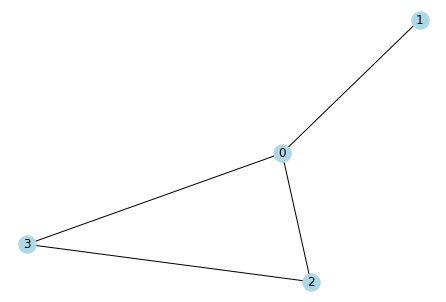

In [ ]:
G = nx.Graph()
### DEBUT SOLUTION

### FIN SOLUTION
nx.draw(G, with_labels=True, node_color='lightblue')

In [ ]:
# @title Exécutez pour tester votre définition de graphe.
G_solution = nx.Graph()
G_solution.add_nodes_from(range(4))
G_solution.add_edges_from([(1, 0), (0, 2), (2, 3), (3, 0)])

if nx.is_isomorphic(G, G_solution):
  print("Votre fonction de tracé de graphes semble correcte.!")
else:
  print("Il semble que quelque chose ne va pas. Essayez encore !")

In [ ]:
#@title ***Tâche 1: Solution*** { display-mode: "form" }
G = nx.Graph()
### DEBUT SOLUTION
G.add_nodes_from(range(4))
G.add_edges_from([(1, 0), (0, 2), (2, 3), (3, 0)])
## FIN SOLUTION
nx.draw(G, with_labels=True, node_color='lightblue')

# Section 2 : Introduction à la bibliothèque jraph

Dans les sections suivantes, nous apprendrons comment représenter des graphes et construire des GNN en Python. Nous utiliserons [jraph](https://github.com/deepmind/jraph), une bibliothèque légère pour travailler avec les GNN dans [JAX](https://github.com/google/jax).

### Représenter un graphe dans jraph

Dans jraph, un graphe est représenté par un objet `GraphsTuple`. En plus de définir la structure du graphe avec les nœuds et les arêtes, vous pouvez également stocker les caractéristiques des nœuds, les caractéristiques des arêtes et les caractéristiques globales du graphe dans un `GraphsTuple`. Par exemple, pour un graphe représentant les connexions routières entre des villes, une caractéristique de nœud pourrait être le nombre de personnes dans cette ville, une caractéristique d’arête pourrait être la longueur de la route entre les villes, et une caractéristique globale pourrait être le trafic total à travers tout le réseau.

Dans le `GraphsTuple`, les arêtes sont représentées par deux tableaux alignés d'indices de nœuds : les expéditeurs (nœuds source) et les récepteurs (nœuds de destination). Chaque indice correspond à une arête, par exemple, l'arête `i` va de `senders[i]` à `receivers[i]`.

Vous pouvez même stocker plusieurs graphes dans un seul objet `GraphsTuple`, de manière similaire à la façon dont le traitement par lots est effectué dans l'apprentissage automatique standard.

Nous commencerons par créer un graphe dirigé simple avec 4 nœuds et 5 arêtes. Nous ajouterons également des caractéristiques factices aux nœuds, en utilisant `2*node_index` comme caractéristique.

Nous utiliserons plus tard ce graphe factice dans la démonstration de GCN.



In [ ]:
def build_toy_graph() -> jraph.GraphsTuple:
  """Définissez un graphe à quatre nœuds, chaque nœud ayant un scalaire comme caractéristique.."""

  # Les nœuds sont définis implicitement par leurs caractéristiques.
  # Nous allons ajouter quatre nœuds, chacun avec une caractéristique, par exemple :
  # le nœud 0 a la caractéristique [0.],
  # le nœud 1 a la caractéristique [2.], etc.
  # len(node_features) est le nombre de nœuds.
  node_features = jnp.array([[0.], [2.], [4.], [6.]])

  # Nous allons maintenant spécifier 5 arêtes orientées connectant les nœuds que nous avons définis ci-dessus.
  # Nous définissons cela avec `senders` (indices des nœuds source) et `receivers`
  # (indices des nœuds de destination).
  # Par exemple, pour ajouter une arête allant du nœud 0 au nœud 1, nous ajoutons 0 à `senders`,
  # et 1 à `receivers`.
  # Nous pouvons faire de même pour les 5 arêtes :

  # 0 -> 1
  # 1 -> 2
  # 2 -> 0
  # 3 -> 0
  # 0 -> 3
  senders = jnp.array([0, 1, 2, 3, 0])
  receivers = jnp.array([1, 2, 0, 0, 3])

  # Vous pouvez éventuellement ajouter des attributs aux 5 arêtes.
  edges = jnp.array([[5.], [6.], [7.], [8.], [8.]])

 # Nous enregistrons ensuite le nombre de nœuds et le nombre d'arêtes.
 # Cette information est utilisée pour permettre l'exécution de GNNs sur plusieurs graphes
 # dans un GraphsTuple.
  n_node = jnp.array([4])
  n_edge = jnp.array([5])

  # Optionnellement, vous pouvez ajouter des informations `globales`, telles qu'une étiquette de graphe.
  global_context = jnp.array([[1]]) # La même dimension de caractéristiques que pour les nœuds et les arêtes.

  # Maintenant, nous créons le graphe.
  graph = jraph.GraphsTuple(
      nodes=node_features,
      edges=edges,
      senders=senders,
      receivers=receivers,
      n_node=n_node,
      n_edge=n_edge,
      globals=global_context
      )
  return graph

In [ ]:
graph = build_toy_graph()

**Discussion en groupe :** *Comment pourriez-vous représenter deux graphes dans un seul `GraphsTuple` ?*

Vous pouvez consulter une partie de la [documentation](https://jraph.readthedocs.io/en/latest/api.html#jraph.batch) une fois que vous avez quelques idées.

## Inspection du GraphsTuple

In [ ]:
# Nombre de nodes
# Notez que `n_node` renvoie un tableau. La longueur de `n_node` correspond au
# nombre de graphes stockés dans un `GraphsTuple`.
# Dans ce cas, nous n'avons qu'un seul graphe, donc n_node a la taille 1.
graph.n_node

In [ ]:
# Nombre d'arêtes.
graph.n_edge

In [ ]:
# Caractéristiques des nœuds
graph.nodes

In [ ]:
# Caractéristiques des arêtes
graph.edges

In [ ]:
# Arêtes
graph.senders

In [ ]:
graph.receivers

In [ ]:
# Caractéristiques au niveau du graphe.
graph.globals

## Visualisation du Graphe
Pour visualiser la structure du graphe que nous avons créé ci-dessus, nous utiliserons la bibliothèque [`networkx`](networkx.org) car elle dispose déjà de fonctions pour dessiner des graphes.

Nous commençons par convertir le `jraph.GraphsTuple` en un `networkx.DiGraph`.

In [ ]:
def convert_jraph_to_networkx_graph(jraph_graph: jraph.GraphsTuple) -> nx.Graph:
  nodes, edges, receivers, senders, _, _, _ = jraph_graph
  nx_graph = nx.DiGraph()
  if nodes is None:
    for n in range(jraph_graph.n_node[0]):
      nx_graph.add_node(n)
  else:
    for n in range(jraph_graph.n_node[0]):
      nx_graph.add_node(n, node_feature=nodes[n])
  if edges is None:
    for e in range(jraph_graph.n_edge[0]):
      nx_graph.add_edge(int(senders[e]), int(receivers[e]))
  else:
    for e in range(jraph_graph.n_edge[0]):
      nx_graph.add_edge(
          int(senders[e]), int(receivers[e]), edge_feature=edges[e])
  return nx_graph


def draw_jraph_graph_structure(jraph_graph: jraph.GraphsTuple) -> None:
  nx_graph = convert_jraph_to_networkx_graph(jraph_graph)
  pos = nx.spring_layout(nx_graph)
  nx.draw(
      nx_graph, pos=pos, with_labels=True, node_size=500, font_color='yellow')

In [ ]:
draw_jraph_graph_structure(graph)

## ***Tâche 2 : Création de GraphsTuple***

Créez le même graphe qu'auparavant, mais cette fois-ci sous forme de `jraph` GraphsTuple. Définissez les attributs des nœuds comme étant les nombres `[0, 1, 2, 3]` (correspondant à l'ID des nœuds) et les attributs des arêtes comme étant la somme des attributs des nœuds adjacents.

Notez que vous devrez spécifier les arêtes dans les deux directions, car `jraph` utilise des graphes orientés.

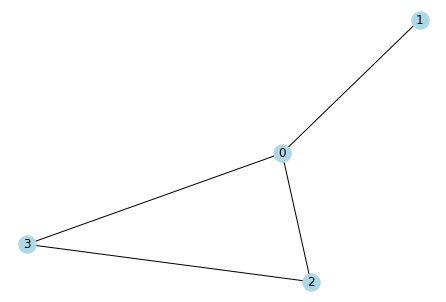

In [ ]:
### DEBUT SOLUTION

### FIN SOLUTION

### Décommentez ce qui suit
# global_context = jnp.array([[1]])

# graph = jraph.GraphsTuple(
#     nodes=node_features,
#     edges=edges,
#     senders=senders,
#     receivers=receivers,
#     n_node=n_node,
#     n_edge=n_edge,
#     globals=global_context,
# )
# draw_jraph_graph_structure(graph)

In [ ]:
#@title ***Tâche 2: Solution*** { display-mode: "form" }
### DEBUT SOLUTION
node_features = jnp.array([[0.], [1.], [2.], [3.]])
sender_nodes = [1, 0, 2, 3]
receiver_nodes = [0, 2, 3, 0]
senders = jnp.array(sender_nodes + receiver_nodes)
receivers = jnp.array(receiver_nodes + sender_nodes)

edge_attributes = []
for i in range(4):
  edge_attributes.append([sender_nodes[i] + receiver_nodes[i]])
edges = jnp.array(edge_attributes + edge_attributes)

n_node = jnp.array([4])
n_edge = jnp.array([8])
### FIN SOLUTION

global_context = jnp.array([[1]])

graph = jraph.GraphsTuple(
    nodes=node_features,
    edges=edges,
    senders=senders,
    receivers=receivers,
    n_node=n_node,
    n_edge=n_edge,
    globals=global_context,
)
draw_jraph_graph_structure(graph)

# Section 3:Théorie des Réseaux de Neurones en Graphes

Un GNN est un réseau de neurones conçu pour fonctionner avec des données de type graphe. Nous commençons avec une représentation initiale de notre problème sous forme de graphe. Dans la figure ci-dessous, vous pouvez voir un exemple de ce type de graphe. Le diagramme illustre de nouveaux aspects importants des réseaux de neurones graphes :
- Chaque nœud a une représentation vectorielle initiale (boîte grise associée à chaque nœud)
- Les nœuds sont connectés par différents types d’arêtes (représentées par des flèches de couleurs différentes). Cependant, nous ne traiterons pour l’instant  que des arêtes d’un seul type.



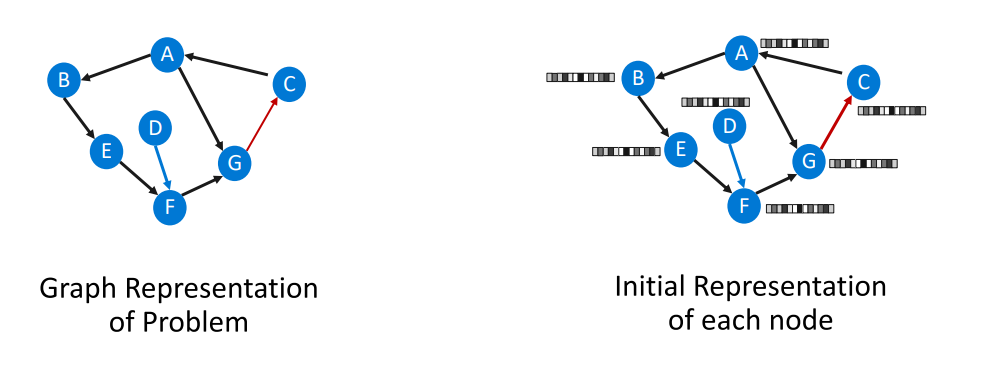

*Source:de l'image [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)*

Le GNN met à jour ces représentations de nœuds pendant l'entraînement, produisant des représentations de sortie spécifiques à la tâche. Un aperçu de ce processus est illustré ci-dessous :

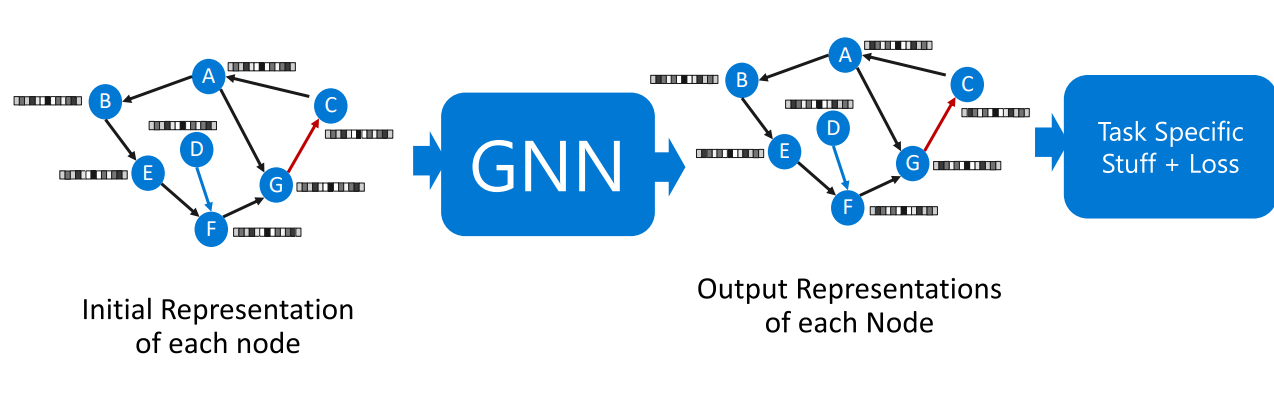


*Source de l'image: [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)*

Le Passage de Messages Neuronal est un cadre populaire pour effectuer cette mise à jour. En résumé, chaque représentation de nœud est mise à jour en échangeant des informations avec les nœuds voisins. Pour examiner la mise à jour des nœuds en détail, considérons un voisinage plus petit du graphe, tel que les nœuds D, E et F illustrés ci-dessous.

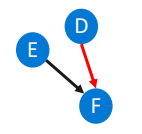

Pour mettre à jour la représentation vectorielle du nœud F, nous considérons les éléments suivants :

- La représentation vectorielle actuelle du nœud F.
- Les représentations vectorielles de tous les nœuds connectés à F (par exemple, E et D).
- Les types d'arêtes des nœuds connectés.

Pour chaque nœud voisin (par exemple, E et D), nous calculons un 'message' en utilisant une fonction $f$, qui prend en entrée la représentation du nœud adjacent et le type d'arête. La sortie de la fonction $f$ est le vecteur de message. Il existe différentes fonctions que nous pourrions utiliser pour préparer ce message, et nous examinerons quelques exemples concrets plus tard dans le tutoriel.

Les messages de tous les nœuds adjacents sont ensuite résumés et utilisés pour mettre à jour l'état actuel du nœud. Le diagramme ci-dessous illustre ce processus, où la représentation vectorielle du nœud F au temps $t$ est étiquetée comme $h^{n}_{t-1}$.


La notation est la suivante :
- $t$ = pas de temps
- $h$ = représentation vectorielle du nœud
- $k$ = type d'arête
- $f$ = fonction qui prépare un message
- $⋃$ = fonction qui résume les messages
- $q$ = fonction de mise à jour des nœuds

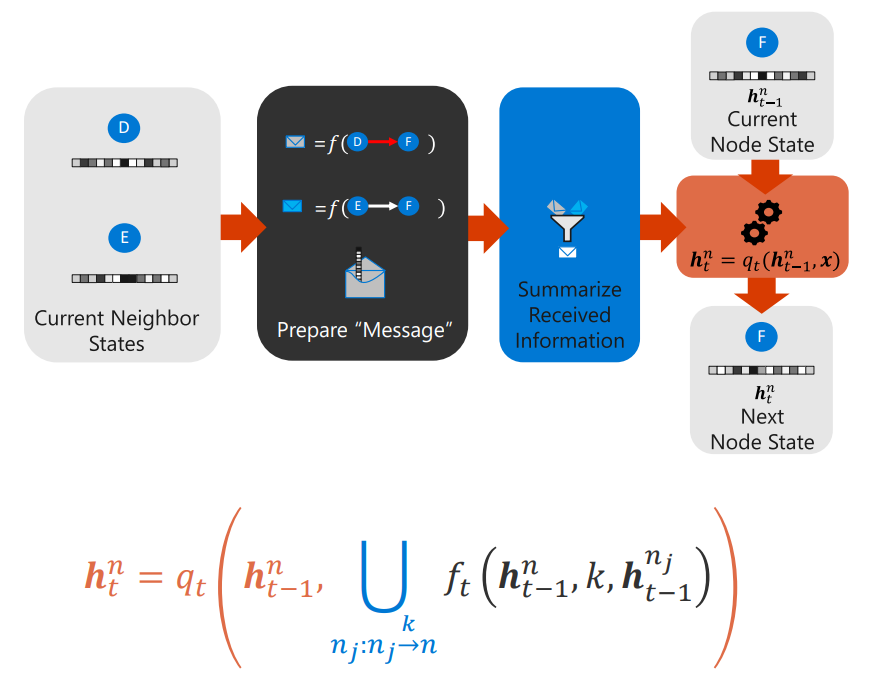



*Source:de l'image [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)*

L' équation en bas de l'image est codée par couleur pour correspondre à chaque étape du diagramme. Par exemple, le noir représente la fonction qui prépare le message, le bleu la fonction qui résume ces messages, et l'orange l'étape de mise à jour du nœud.

Notez que $⋃$ doit être invariant par permutation, car les messages ne sont pas ordonnés.

## Tâches de Prédiction sur les Graphes
Quels sont les types de problèmes que nous voulons résoudre sur les graphes ?

Les tâches se répartissent en trois grandes catégories, selon que la tâche nécessite (1) des sorties pour chaque nœud, (2) des sorties pour des paires de nœuds, ou (3) une sortie pour l'ensemble du graphe :

1. **Classification des Nœuds** : Par exemple, quel est le sujet d'un article donné un réseau de citations d'articles ?
2. **Prédiction de Liens / Classification des Arêtes** : Par exemple, deux personnes dans un réseau social sont-elles amies ?
3. **Classification des Graphes** : Par exemple, cette molécule de protéine (représentée sous forme de graphe) est-elle susceptible d'être efficace ?

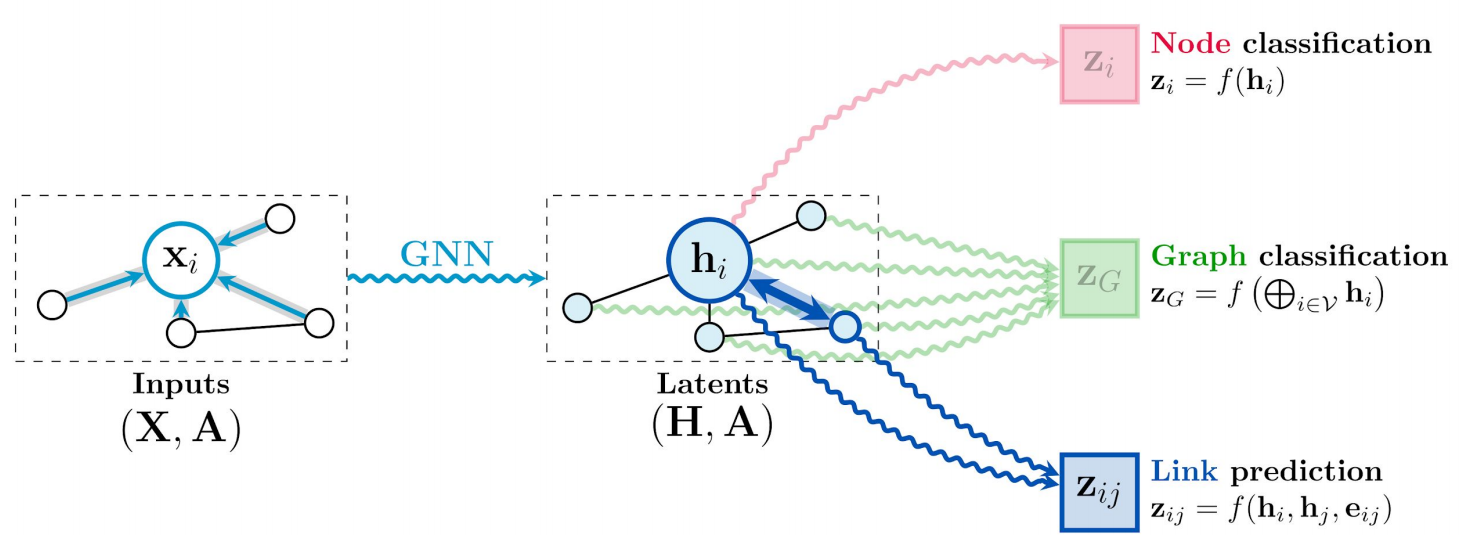

*Les trois principales tâches d'apprentissage des graphes. Source de l'image : Petar Veličković.*

Quels exemples de tâches de prédiction sur les graphes vous viennent à l'esprit ? À quel type de tâche correspondent-ils ?


# Section 4: Mise à jour locale des caractéristiques des nœuds

La perspective générale sur la manière dont les GNNs sont appliqués :

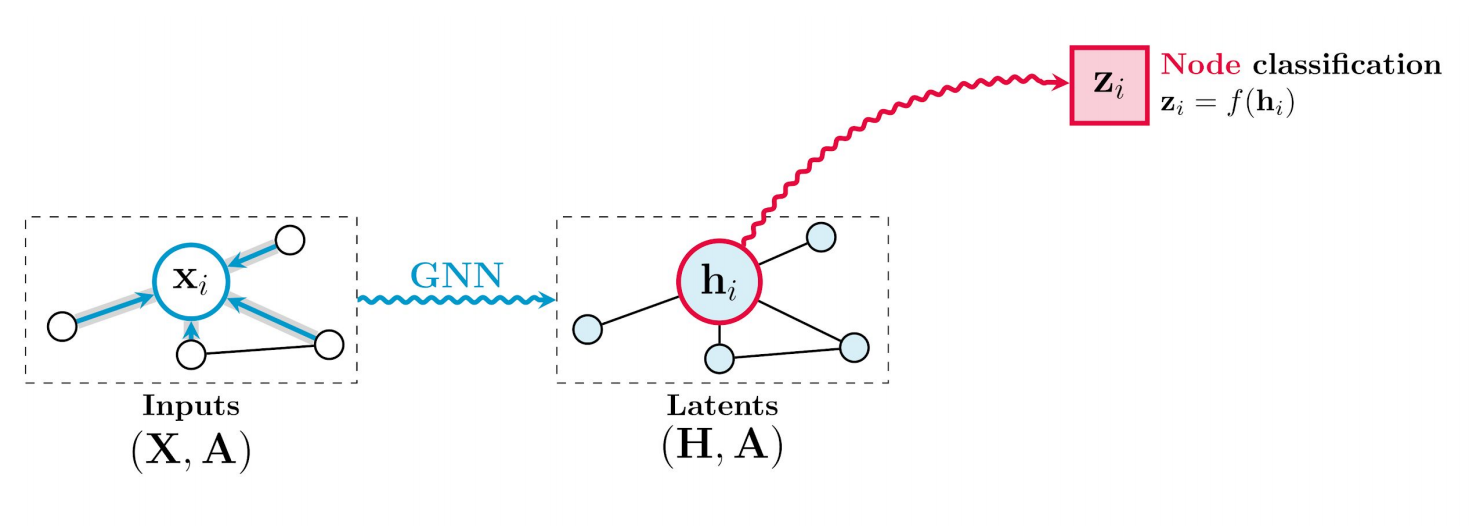

Nous partons d'un graphe avec une matrice d'adjacence $A$ et des caractéristiques de nœuds $x_i$. En utilisant un GNN, pour chaque nœud, nous calculons (en fonction de son voisinage) un vecteur de caractéristiques latent $h_i$, en *agrégeant* les caractéristiques des nœuds adjacents. Avec ces vecteurs latents, nous pouvons tenter de résoudre diverses tâches, où pour l'instant nous nous concentrons sur la **classification des nœuds**.

Dans la classification des nœuds, nous disposons le plus souvent d'un seul graphe, où seule une partie des nœuds est étiquetée. En utilisant ces nœuds comme signal pour l'entraînement, notre objectif est de classifier avec succès les nœuds restants. À cette fin, nous examinons les vecteurs latents des nœuds précédemment calculés en isolation, et apprenons un classificateur $z_i = f(h_i)$.

Pour ce faire, essayons d'abord de mettre à jour les caractéristiques des nœuds localement, sans aucune information provenant des nœuds voisins.

## ***Implémentez la base de référence MLP***
Tout d'abord, définissons un module MLP qui sera utilisé pour mettre à jour les caractéristiques des nœuds.

Notez que nous utiliserons haiku pour cet exercice pratique, mais il y a un mouvement général dans la communauté jax vers l'utilisation de flax. En conséquence, nous vous recommandons d'utiliser flax si vous prévoyez de commencer un nouveau projet.[guide de migration](https://flax.readthedocs.io/en/latest/guides/converting_and_upgrading/haiku_migration_guide.html).

In [ ]:
class MLP(hk.Module):
  def __init__(self, widening_factor:int, out_channels:int, number_classes: int = None):
    super().__init__()
    self.widening_factor = widening_factor
    self.out_channels = out_channels
    self.number_classes = number_classes

  def __call__(self, x: jnp.ndarray) -> jnp.ndarray:

    mlp = hk.Sequential([hk.Linear(self.out_channels),
                         jax.nn.relu,
                         hk.Linear(self.out_channels * self.widening_factor),
                         jax.nn.relu,
                         hk.Linear(self.out_channels if not self.number_classes else self.number_classes)])

    return mlp(x)

# Utilisez le bloc MLP pour définir la fonction de mise à jour des nœuds
update_node_fn = lambda x: MLP(widening_factor = 2, out_channels = 4)(x)

## Vérifiez les sorties de `update_node_fn` avec le bloc MLP

In [ ]:
graph = build_toy_graph()

In [ ]:
update_node_module = hk.without_apply_rng(hk.transform(update_node_fn))
params = update_node_module.init(jax.random.PRNGKey(42), graph.nodes) # initialiser un modèle MLP
out = update_node_module.apply(params, graph.nodes) # appliquer le MLP aux caractéristiques des nœuds

Voici les caractéristiques originales des nœuds:

In [ ]:
graph.nodes

En sortie, nous attendons les caractéristiques des nœuds mises à jour. Nous devrions voir un tableau de dimension 4 pour chacun des 4 nœuds, ce qui est le résultat de l'application d'un seul bloc MLP aux caractéristiques de chaque nœud individuellement.

Remarquez que la première ligne est entièrement composée de $0$, puisque la caractéristique initiale du nœud était également $0$.

In [ ]:
out

## ***Tâche 3 : Fonctions de mise à jour arbitraires***

Les fonctions de mise à jour des nœuds n'ont même pas besoin d'être des réseaux de neurones. En utilisant le code ci-dessous comme cadre, créez une fonction de mise à jour des nœuds `Add` qui ajoutera le nombre donné à chaque caractéristique de nœud.

In [ ]:
### DEBUT SOLUTION
### Créez un hk.Module appelé 'Add' ici, qui pourra être utilisé par le code ci-dessous

### FIN SOLUTION

### DÉCOMMENTEZ CE QUI SUIT
# print("Before:\n", graph.nodes)
# update_node_fn = lambda x: Add(number_to_add=3)(x)
# update_node_module = hk.without_apply_rng(hk.transform(update_node_fn))
# params = update_node_module.init(jax.random.PRNGKey(42), graph.nodes)
# out = update_node_module.apply(params, graph.nodes)
# print("After:\n", out)

In [ ]:
# @title Exécutez pour tester votre fonction de mise à jour.
if jnp.allclose(out, jnp.array([[3.], [5.], [7.] ,[9.]])):
  print("Votre fonction semble correcte !")
else:
  print("Il semble que quelque chose ne va pas. Essayez encore !")

In [ ]:
#@title ***Tâche 3: Solution*** { display-mode: "form" }
### DEBUT SOLUTION
class Add(hk.Module):
  def __init__(self, number_to_add: int):
    super().__init__()
    self.number_to_add = number_to_add

  def __call__(self, x: jnp.ndarray) -> jnp.ndarray:
    return x + self.number_to_add
### FIN SOLUTION

print("Before:\n", graph.nodes)
update_node_fn = lambda x: Add(number_to_add=3)(x)
update_node_module = hk.without_apply_rng(hk.transform(update_node_fn))
params = update_node_module.init(jax.random.PRNGKey(42), graph.nodes)
out = update_node_module.apply(params, graph.nodes)
print("After:\n", out)

# Section 5: Agrégation du voisinage

Rappelez-vous le schéma suivant d'une couche de GNN.

Pour chaque nœud voisin (par exemple, E et F), nous calculons un  'message' en utilisant une certaine fonction $f$, qui prend en entrée la représentation du nœud adjacent et le type d'arête. La sortie de la fonction $f$ est le vecteur de message. Pour l'instant, le message est simplement la représentation actuelle du nœud.

Les messages de tous les nœuds adjacents sont ensuite résumés et utilisés pour mettre à jour l'état actuel du nœud. Le diagramme ci-dessous illustre ce processus, où la représentation vectorielle du nœud F au temps $t$ est étiquetée comme $h^{n}_{t-1}$.

La notation est la suivante :
- $t$ = pas de temps
- $h$ = représentation vectorielle du nœud
- $k$ = type d'arête
- $f$ = fonction qui prépare un message
- $⋃$ = fonction qui résume les messages
- $q$ = fonction de mise à jour des nœuds

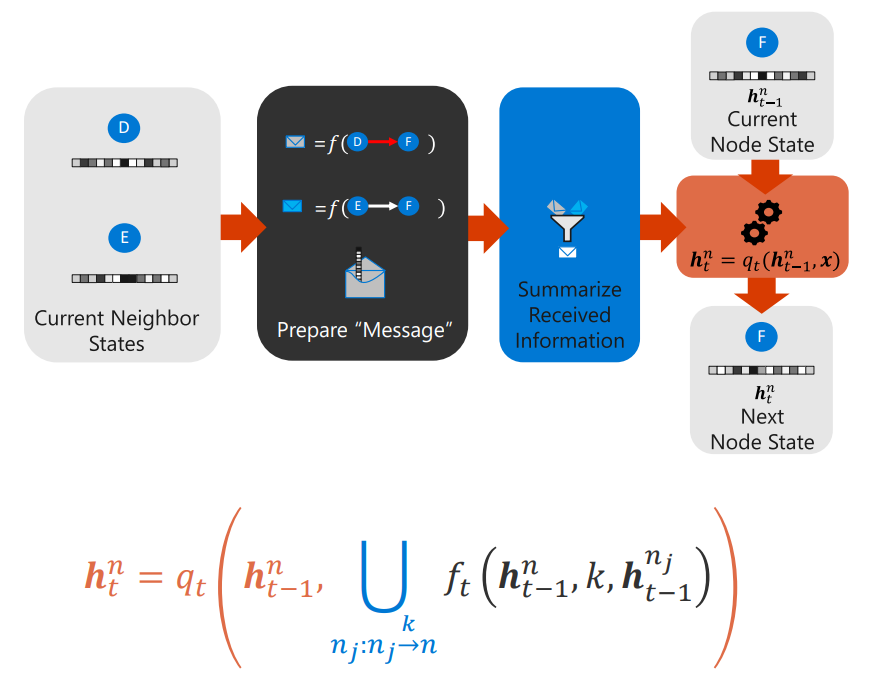


*Source de l'image: [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)*

Nous avons déjà vu comment implémenter $q_t$ en utilisant un MLP. La question maintenant est : comment pouvons-nous implémenter la synthèse des informations reçues, dans l'opérateur $\cup$.

Ici et dans le reste de l'exercice, nous nous concentrerons sur l'utilisation de la **sommation** pour $\cup$. Cependant, d'autres opérateurs tels que la maximisation peuvent également être utilisés.

## Invariance et Equivariance

Tout d'abord, nous devons répondre à la question : pourquoi ne pouvons-nous pas simplement appliquer un MLP directement à la matrice d'adjacence ?

Le premier problème est que les MLP ont une taille d'entrée fixe. Par conséquent, ils ne pourront pas gérer des graphes de tailles différentes, ce qui donne des matrices d'adjacence de tailles différentes.

Le deuxième problème, plus fondamental, concerne l'isomorphisme des graphes. Considérez les deux matrices d'adjacence suivantes :

(1) $$\begin{array}{l|llll}
 source \setminus dest    & n_0 & n_1 & n_2 & n_3 \\ \hline
n_0 & 0    & 1    & 0    & 1    \\
n_1 & 1    & 0    & 1    & 0    \\
n_2 & 0    & 1    & 0    & 1    \\
n_3 & 1    & 0    & 1    & 0
\end{array}$$

(2) $$\begin{array}{l|llll}
 source \setminus dest    & n_0 & n_1 & n_2 & n_3 \\ \hline
n_0 & 0    & 1    & 1    & 0    \\
n_1 & 1    & 0    & 0    & 1    \\
n_2 & 1    & 0    & 0    & 1    \\
n_3 & 0    & 1    & 1    & 0
\end{array}$$

Voici, respectivement, les deux graphes ci-dessus.

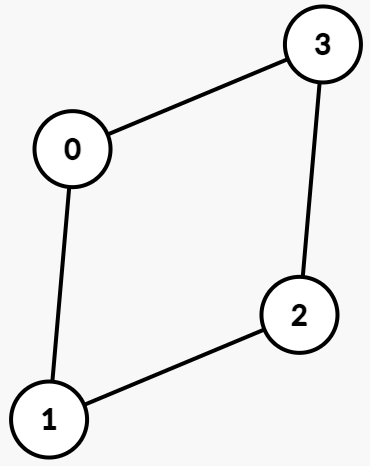
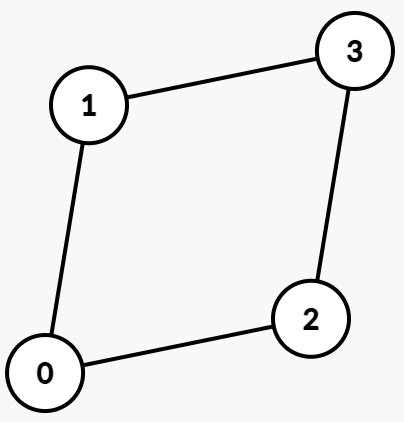

Notez que les deux graphes sont isomorphes : ils sont structurellement identiques, puisque la dénomination des nœuds est arbitraire.

Formellement, deux graphes $G$ et $H$ sont isomorphes s'il existe un bijection entre les sommets de $G$ et $H$ telle que les arêtes soient préservées. Formellement : $G$ est isomorphe à $H$ s'il existe une bijection $\pi: V(G) \to V(H)$ telle que chaque arête $(u, v) \in E(G)$ si et seulement si $(\pi(u), \pi(v)) \in E(H)$. Nous exigeons également que les caractéristiques des nœuds et des arêtes soient préservées.

En d'autres termes, si vous pouvez réorganiser tous les nœuds du graphe G pour correspondre exactement aux alignements des nœuds du graphe H sans déformer les connexions entre chaque nœud, alors G et H sont isomorphes.

Cependant, les matrices d'adjacence ne sont pas égales! Ainsi, un MLP considérera ces graphes comme différents, même s'ils devraient être traités de la même manière. Utilisons notre MLP précédemment défini pour voir cela en action.

## Essayez d'utiliser un MLP

Tout d'abord, définissez les matrices d'adjacence.

In [ ]:
adj1 = jnp.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
])
adj2 = jnp.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
])
adj1 = adj1.astype(float)
adj2 = adj2.astype(float)

Ensuite, définissez notre petit MLP et appliquez-le aux matrices d'adjacence.

In [ ]:
def small_mlp_fn(features: jnp.ndarray) -> jnp.ndarray:
    mlp = hk.Sequential([
        hk.Flatten(),
        hk.Linear(4), jax.nn.relu,
        hk.Linear(1), jax.nn.sigmoid
    ])
    return mlp(features)

update_from_adjacency_module = hk.without_apply_rng(hk.transform(small_mlp_fn))
params = update_from_adjacency_module.init(jax.random.PRNGKey(42), adj1) # initialiser un modèle MLP
out_adj1 = update_from_adjacency_module.apply(params, adj1) # appliquer le MLP à la première matrice d'adjacence
out_adj2 = update_from_adjacency_module.apply(params, adj2) # appliquer le MLP à la deuxième matrice d'adjacence

In [ ]:
out_adj1

In [ ]:
out_adj2

Remarquez que les deux sorties sont différentes, même si les graphes sous-jacents sont identiques. Essayons maintenant une approche différente.

## Multiplication par la Matrice d'Adjacence
Imaginons que nous ayons un vecteur de valeurs de caractéristiques pour chaque nœud du graphe, où le premier élément du vecteur représente la caractéristique du nœud $0$, et ainsi de suite.

Que se passerait-il si nous multiplions la matrice d'adjacence par ce vecteur de caractéristiques ?

In [ ]:
fv = jnp.array([
    [1.0, 0.0, 2.0],
    [1.0, 0.0, 2.0],
    [1.0, 0.0, 2.0],
    [1.0, 0.0, 2.0],
])
adj_1_product = jnp.matmul(adj1, fv)
adj_2_product = jnp.matmul(adj2, fv)

In [ ]:
adj_1_product

In [ ]:
adj_2_product

Maintenant, les résultats sont identiques, même si les matrices d'adjacence sont différentes ! Utilisons un vecteur de caractéristiques encore plus simple pour examiner de plus près ce qui se passe ici, en utilisant le premier graphe comme exemple.

In [ ]:
fv = jnp.array([
    [1.0],
    [0.0],
    [0.0],
    [0.0],
])
product_1 = jnp.matmul(adj1, fv)

In [ ]:
product_1

Remarquez que le $1.0$ du nœud $0$ s'est maintenant déplacé vers ses voisins, les nœuds $1$ et $3$. Essayons à nouveau avec un autre vecteur de caractéristiques.

In [ ]:
fv = jnp.array([
    [1.0],
    [0.0],
    [2.0],
    [0.0],
])
product_2 = jnp.matmul(adj1, fv)

In [ ]:
product_2

Maintenant, les valeurs des nœuds $0$ et $2$ ont été additionnées dans leurs voisins, les nœuds $1$ et $3$. Cela illustre ce qui se passe réellement lorsque vous multipliez le vecteur de caractéristiques par la matrice d'adjacence : chaque nœud reçoit la somme des valeurs de ses voisins !

Cela sera crucial pour définir notre premier véritable GNN dans la prochaine section.

Remarquez également que, puisque la somme ne dépend pas de l'ordre des nœuds, les deux graphes ci-dessus seront traités de la même manière par un GNN qui utilise la multiplication par la matrice d'adjacence pour agréger les informations de voisinage. Cela résout le problème que nous avions, celui de la nécessité d'avoir un GNN qui se comporte de la même manière pour des graphes isomorphes.


## Quelques formalités (facultatif)


Nous pouvons décrire plus formellement ce que nous entendons par « les GNN doivent se comporter de la même manière pour les graphes isomorphes ».

Une permutation $\sigma$ sur un graphe $G$ produit le graphe $H := \sigma \cdot G$, où $V(H) = V(G)$, $E(H) = { (\sigma(u),~ \sigma(v)) | (u,~ v) \in E(G) }$, et les étiquettes des nœuds $G_u = H_{\sigma(u)}$ pour chaque $u \in V(G)$.

Intuitivement, si une fonction de graphe a une sortie pour chaque nœud, alors permuter les nœuds de l'entrée devrait être équivalent à appliquer la même permutation aux valeurs de sortie. Une fonction d'étiquetage des nœuds $f$ associe à chaque $G = (V,E,\lambda)$ dans son domaine avec $V(G) = {1,2,...,n}$ un assignement $f(G) \in \mathbb{L}^n$ des nœuds de $G$ aux valeurs du codomaine $\mathbb{L}$.

Une fonction d'étiquetage des nœuds $f$ sur un domaine $D$ fermé sous permutation est *équivariante* si $f(\sigma \cdot G) = \sigma \cdot f(G)$ est vrai pour tous les $G \in D$ et les permutations $\sigma$ sur $V(G)$.

Une fonction qui attribue des valeurs à chaque graphe (au lieu de chaque nœud) est de même *invariante* si $f(\sigma \cdot G) = f(G)$ est vrai pour tous les $G \in D$.

La figure ci-dessous est une illustration de l’équivariance, qui est la propriété capturée lorsque nous multiplions par la matrice d'adjacence.

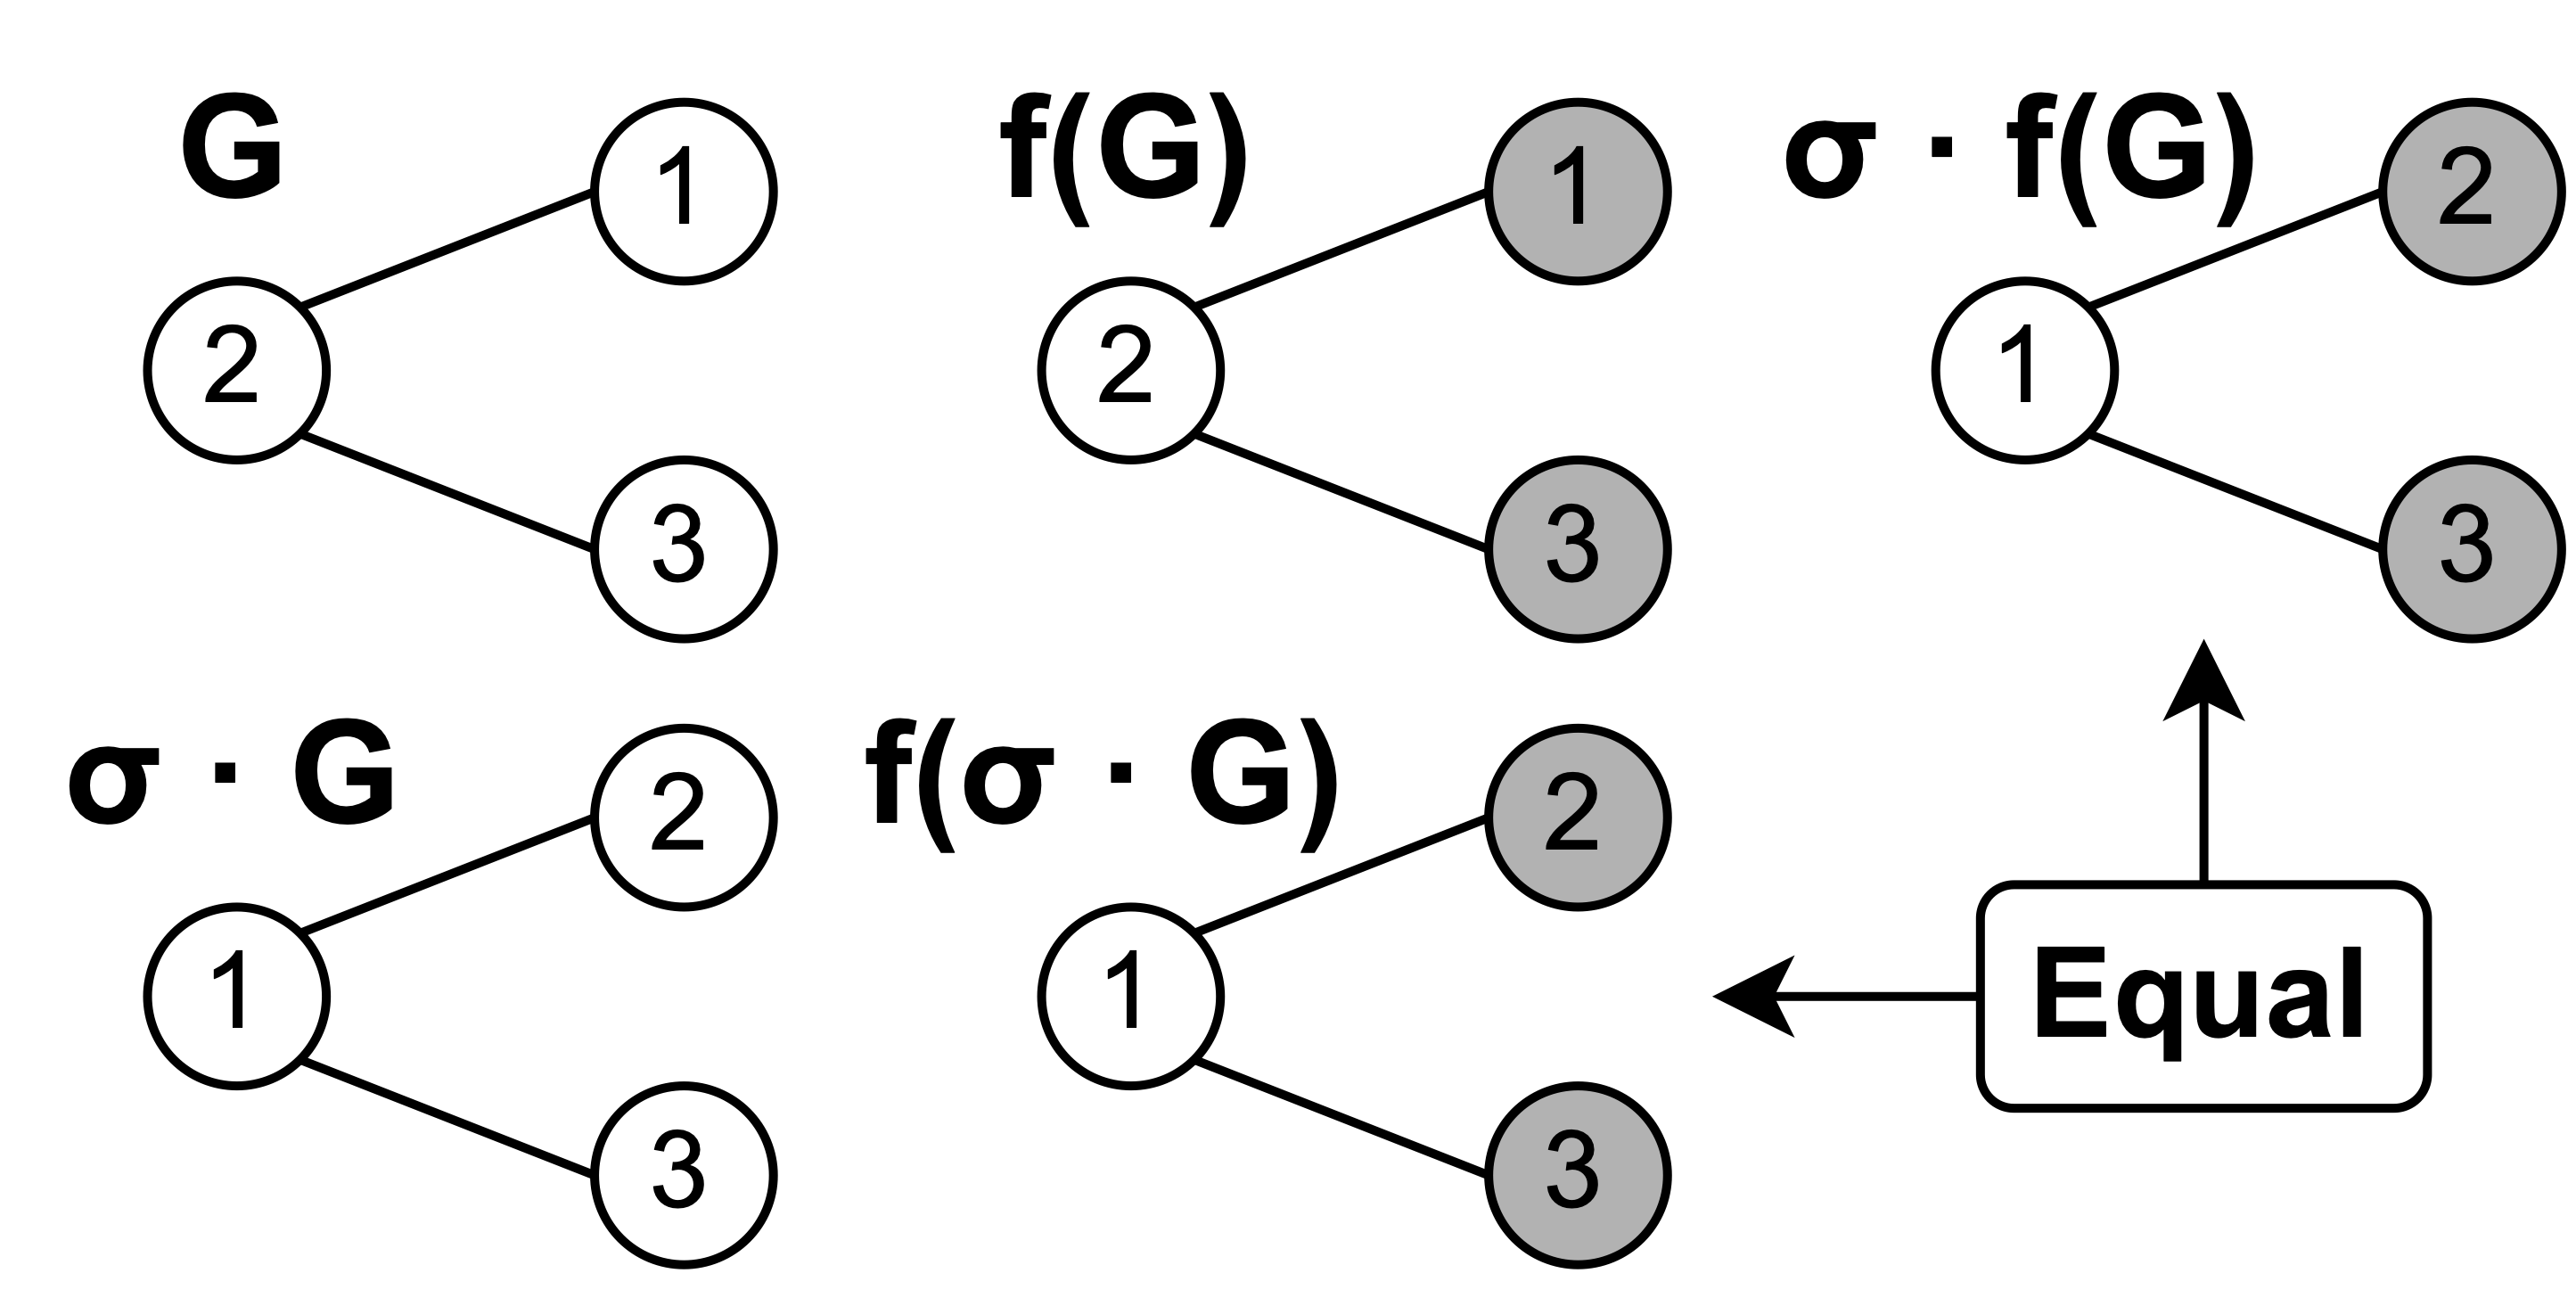

# Section 6: Réseaux convolutifs pour graphes(GCN)

Nous pouvons commencer à travailler sur notre modèle GCN (Graph Convolutional Network ou Réseaux convolutifs pour graphes), qui est une instance spécifique des GNN.

Étant donnés en entrée $A$, la matrice d'adjacence $N \times N$, et $H$, la matrice de caractéristiques $N \times F$, où chaque nœud a un vecteur de caractéristiques de dimension $F$, la règle de propagation de mean-pool est la suivante :
$$ H' = \sigma(D^{-1}AHW^T) $$
Ici, $W$ est une matrice de poids apprenables de forme $F' \times F$, $D$ est la matrice diagonale contenant les degrés des nœuds, $\sigma(\cdot)$ est une fonction d'activation non linéaire (par exemple, ReLU), et $H'$ contient les caractéristiques des nœuds en sortie ($N \times F'$).

En nous concentrant sur le nœud $i$, nous obtenons l'équation suivante pour ses caractéristiques (où $\mathsf{N}(i)$ est l'ensemble de ses voisins) :
$$ h'_i = \sigma \left( \frac{1}{|\mathsf{N}(i)|}\sum_{j \in \mathsf{N}(i)}  Wh_j \right) $$

Autrement dit, nous effectuons simplement la moyenne des caractéristiques transformées de tous les voisins.

## Ajouter une Normalisation Symétrique

Notez que les nœuds peuvent avoir un nombre différent de voisins / degrés. Cela pourrait entraîner des instabilités pendant l'entraînement du réseau neuronal, par exemple des gradients explosifs ou disparus. Pour y remédier, la normalisation est une méthode couramment utilisée. Dans ce cas, nous normaliserons par les degrés des nœuds.

Comme première tentative, nous pourrions compter le nombre d'arêtes entrantes (y compris l'arête auto-référencée) et diviser par cette valeur.

Plus formellement, soit $A$ la matrice d'adjacence définissant les arêtes du graphe.

Nous définissons alors la matrice de degré $D$ comme une matrice diagonale avec $D_{ii} = \sum_j A_{ij}$ (le degré du nœud $i$).

Nous pouvons maintenant normaliser $AH$ en le divisant par les degrés des nœuds :
$${D}^{-1}AH$$

Pour prendre en compte à la fois les degrés entrants et sortants (pour les graphes dirigés), nous pouvons utiliser la normalisation symétrique, qui est également ce que Kipf et Welling ont proposé dans leur [article](https://arxiv.org/abs/1609.02907) :
$$D^{-\frac{1}{2}}AD^{-\frac{1}{2}}H$$

Notre fonction de mise à jour serait alors :

$$ H' = \sigma(D^{-\frac{1}{2}}AD^{-\frac{1}{2}}HW^T) $$





## Implémentation

Essayons de définir une opération pour la normalisation : $D^{-\frac{1}{2}}H$. Nous commencerons par extraire les éléments de notre graphe.

In [ ]:
nodes, _, receivers, senders, _, _, _ = build_toy_graph()
nodes += 1

Ensuite, calculons le nombre d'arêtes entrantes et sortantes pour chaque nœud.

In [ ]:
# Obtenons le nombre total de nœuds
total_num_nodes = tree.tree_leaves(nodes)[0].shape[0]

# Définir une fonction pour compter le nombre d'arêtes sortantes / entrantes
count_edges = lambda x: jax.ops.segment_sum(
                jnp.ones_like(senders), x, total_num_nodes)

# Calculons le nombre d'arêtes sortantes / entrantes
sender_degree = count_edges(senders)
receiver_degree = count_edges(receivers)

Enfin, nous pouvons calculer $D^{-\frac{1}{2}}H$ en utilisant [`jax.tree_util.tree_map`](https://jax.readthedocs.io/en/latest/_autosummary/jax.tree_util.tree_map.html).

In [ ]:
# # Normaliser préalablement par la racine carrée du degré de l'expéditeur.
# Évitez la division par 0 en prenant le maximum de (degré, 1).
print("Avant:\n", nodes)
nodes = tree.tree_map(
    lambda x: x * jax.lax.rsqrt(jnp.maximum(sender_degree, 1.0))[:, None],
    nodes,
)
print("\nAprès:\n", nodes)

## Ajouter des Arêtes Auto-Référencées au Graphe (Arêtes reliant un nœud à lui-même)

Pour chaque nœud, ajoutez une arête reliant le nœud à lui-même. De cette manière, les nœuds incluront leurs propres caractéristiques dans l'étape d'agrégation.

*Remarque* : si nous n'ajoutons pas d'arêtes auto-référencées, un nœud ne dépendrait pas de ses propres caractéristiques, ce qui est souvent indésirable.

In [ ]:
def add_self_edges_fn(receivers: jnp.ndarray, senders: jnp.ndarray,
                      total_num_nodes: int) -> Tuple[jnp.ndarray, jnp.ndarray]:
  """Adds self edges. Assumes self edges are not in the graph yet."""
  receivers = jnp.concatenate((receivers, jnp.arange(total_num_nodes)), axis=0)
  senders = jnp.concatenate((senders, jnp.arange(total_num_nodes)), axis=0)
  return receivers, senders

## Implémentation de la Couche GCN

En mettant tout ensemble, nous pouvons maintenant écrire une version plus générale et configurable de la couche de Convolution en Graphes (GCN), permettant à l'utilisateur de spécifier :

* **`update_node_fn`** : Fonction à utiliser pour mettre à jour les caractéristiques des nœuds (par exemple, la version du bloc MLP que nous venons de mettre en œuvre).
* **`aggregate_nodes_fn`** : Fonction d'agrégation à utiliser pour agréger les messages du voisinage.
* **`add_self_edges`** : Indique s'il faut ajouter des arêtes auto-référencées pour l'étape d'agrégation.
* **`symmetric_normalization`** : Indique s'il faut ajouter une normalisation symétrique.



In [ ]:
# Adapté de https://github.com/deepmind/jraph/blob/master/jraph/_src/models.py#L506
def GraphConvolution(update_node_fn: Callable,
                    aggregate_nodes_fn: Callable = jax.ops.segment_sum,
                    add_self_edges: bool = False,
                    symmetric_normalization: bool = True) -> Callable:
    """Retourne une méthode qui applique une couche de Convolution sur Graphes.

    Couche de Convolution sur Graphes comme dans https://arxiv.org/abs/1609.02907,
    REMARQUE : Cette implémentation n'ajoute pas d'activation après l'agrégation.
    Si vous empilez des couches, vous voudrez peut-être ajouter une activation entre chaque couche.

    Args:
        update_node_fn : fonction utilisée pour mettre à jour les nœuds. Dans l'article, une MLP
        à une seule couche est utilisée.
        aggregate_nodes_fn : fonction utilisée pour agréger les nœuds émetteurs.
        add_self_edges : indique s'il faut ajouter des arêtes auto-référencées aux nœuds dans le graphe,
        comme dans la définition de la GCN dans l'article. Par défaut, cette option est désactivée (False).
        symmetric_normalization : indique s'il faut utiliser une normalisation symétrique. Par défaut,
        cette option est activée (True).

    Retourne:
        une méthode qui applique une couche de Convolution sur Graphes.
    """

    def _ApplyGCN(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
        """Applique une couche de Convolution sur Graphes."""
        nodes, _, receivers, senders, _, _, _ = graph

        # Commencer par passer les nœuds à travers le module de mise à jour des nœuds.
        nodes = update_node_fn(nodes)
        # Équivalent à jnp.sum(n_node), mais jittable
        total_num_nodes = tree.tree_leaves(nodes)[0].shape[0]
        if add_self_edges:
            # Nous ajoutons des arêtes auto-référencées aux émetteurs et récepteurs afin que chaque nœud
            # s'inclue dans l'agrégation.
            # En principe, un GraphsTuple devrait être partitionné par n_edge, mais dans
            # ce cas, ce n'est pas nécessaire puisque un GCN est indépendant du fait que
            # le GraphsTuple soit un lot de graphes ou un seul grand graphe.
            conv_receivers, conv_senders = add_self_edges_fn(receivers, senders,
                                                        total_num_nodes)
        else:
            conv_senders = senders
            conv_receivers = receivers

        # pylint: disable=g-long-lambda
        if symmetric_normalization:
            # Calculer les valuers de normalisation.
            count_edges = lambda x: jax.ops.segment_sum(
                jnp.ones_like(conv_senders), x, total_num_nodes)
            sender_degree = count_edges(conv_senders)
            receiver_degree = count_edges(conv_receivers)

            # Normaliser préalablement par la racine carrée du degré de l'expéditeur.
            # Évitez la division par 0 en prenant le maximum de (degré, 1).
            nodes = tree.tree_map(
                lambda x: x * jax.lax.rsqrt(jnp.maximum(sender_degree, 1.0))[:, None],
                nodes,
            )
            # Regroupez les nœuds pré-normalisés.
            nodes = tree.tree_map(
                lambda x: aggregate_nodes_fn(x[conv_senders], conv_receivers,
                                            total_num_nodes), nodes)
            # Normaliser ensuite par la racine carrée du degré du récepteur.
            # Évitez la division par 0 en prenant le maximum de (degré, 1).
            nodes = tree.tree_map(
                lambda x:
                (x * jax.lax.rsqrt(jnp.maximum(receiver_degree, 1.0))[:, None]),
                nodes,
            )
        else:
            nodes = tree.tree_map(
                lambda x: aggregate_nodes_fn(x[conv_senders], conv_receivers,
                                            total_num_nodes), nodes)
        # pylint: enable=g-long-lambda
        return graph._replace(nodes=nodes)

    return _ApplyGCN

### Test de la Couche GCN Générale

In [ ]:
gcn_layer = GraphConvolution(
    update_node_fn = lambda n: MLP(widening_factor = 2, out_channels = 4)(n),
    aggregate_nodes_fn = jax.ops.segment_sum,
    add_self_edges = True,
    symmetric_normalization = True
)

In [ ]:
graph = build_toy_graph()
network = hk.without_apply_rng(hk.transform(gcn_layer))
params = network.init(jax.random.PRNGKey(42), graph)
out_graph = network.apply(params, graph)
out_graph.nodes

## ***Tâche 4 : Normalisation asymétrique***

En adaptant la fonction `GraphConvolution` ci-dessus, écrivez une fonction `GraphConvolutionNormalize` qui propose une option de `normalisation` au lieu de `symmetric_normalization`. La définition de cette couche GCN devrait correspondre à une normalisation qui prend en compte uniquement les arêtes entrantes
$${D}^{-1}AH$$
au lieu de la normalisation symétrique
$$D^{-\frac{1}{2}}AD^{-\frac{1}{2}}H$$

In [ ]:
def GraphConvolutionNormalize(update_node_fn: Callable,
                              aggregate_nodes_fn: Callable = jax.ops.segment_sum,
                              add_self_edges: bool = False,
                              normalization: bool = True) -> Callable:
    def _ApplyGCN(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
        nodes, _, receivers, senders, _, _, _ = graph

        nodes = update_node_fn(nodes)
        total_num_nodes = tree.tree_leaves(nodes)[0].shape[0]
        if add_self_edges:
            conv_receivers, conv_senders = add_self_edges_fn(receivers, senders, total_num_nodes)
        else:
            conv_senders = senders
            conv_receivers = receivers

        # pylint: disable=g-long-lambda
        if normalization:
            ### DEBUT SOLUTION
            nodes = nodes # RETIREZ CETTE LIGNE
            ### FIN SOLUTION
        else:
            nodes = tree.tree_map(
                lambda x: aggregate_nodes_fn(x[conv_senders], conv_receivers,
                                            total_num_nodes), nodes)
        # pylint: enable=g-long-lambda
        return graph._replace(nodes=nodes)

    return _ApplyGCN

gcn_layer = GraphConvolutionNormalize(
    update_node_fn = lambda n: MLP(widening_factor = 2, out_channels = 4)(n),
    aggregate_nodes_fn = jax.ops.segment_sum,
    add_self_edges = True,
    normalization = True
)

graph = build_toy_graph()
network = hk.without_apply_rng(hk.transform(gcn_layer))
params = network.init(jax.random.PRNGKey(42), graph)
out_graph = network.apply(params, graph)
out_graph.nodes

In [ ]:
# @title Exécutez pour tester votre implémentation de GCN.
expected_out_nodes = jnp.array([
    [-4.0438256, -0.25567064, 4.191698, -2.1424618],
    [-1.2131476, -0.07670121, 1.2575094,-0.64273846],
    [-3.639443  , -0.23010363,  3.7725282 , -1.9282154],
    [-3.639443  , -0.23010355,  3.7725282 , -1.9282159 ],
])

if jnp.allclose(out_graph.nodes, expected_out_nodes):
  print("Votre fonction semble correcte !")
else:
  print("Il semble que quelque chose ne va pas. Essayez encore !")

In [ ]:
#@title ***Tâche 4: Solution*** { display-mode: "form" }
def GraphConvolutionNormalize(update_node_fn: Callable,
                              aggregate_nodes_fn: Callable = jax.ops.segment_sum,
                              add_self_edges: bool = False,
                              normalization: bool = True) -> Callable:
    def _ApplyGCN(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
        nodes, _, receivers, senders, _, _, _ = graph

        nodes = update_node_fn(nodes)
        total_num_nodes = tree.tree_leaves(nodes)[0].shape[0]
        if add_self_edges:
            conv_receivers, conv_senders = add_self_edges_fn(receivers, senders, total_num_nodes)
        else:
            conv_senders = senders
            conv_receivers = receivers

        # pylint: disable=g-long-lambda
        if normalization:
            ### DEBUT SOLUTION
            # Calculez les degrés des nœuds
            count_edges = lambda x: jax.ops.segment_sum(
                jnp.ones_like(conv_senders), x, total_num_nodes)
            receiver_degree = count_edges(conv_receivers)

            # Regroupez les nœuds.
            nodes = tree.tree_map(
                lambda x: aggregate_nodes_fn(x[conv_senders], conv_receivers,
                                            total_num_nodes), nodes)
            # Normaliser par le degré du récepteur.
            # Évitez la division par 0 en prenant le maximum de (degré, 1).
            nodes = tree.tree_map(
                lambda x:
                (x / jnp.maximum(receiver_degree, 1.0)[:, None]),
                nodes,
            )
            # FIN SOLUTION
        else:
            nodes = tree.tree_map(
                lambda x: aggregate_nodes_fn(x[conv_senders], conv_receivers,
                                            total_num_nodes), nodes)
        # pylint: enable=g-long-lambda
        return graph._replace(nodes=nodes)

    return _ApplyGCN

gcn_layer = GraphConvolutionNormalize(
    update_node_fn = lambda n: MLP(widening_factor = 2, out_channels = 4)(n),
    aggregate_nodes_fn = jax.ops.segment_sum,
    add_self_edges = True,
    normalization = True
)

graph = build_toy_graph()
network = hk.without_apply_rng(hk.transform(gcn_layer))
params = network.init(jax.random.PRNGKey(42), graph)
out_graph = network.apply(params, graph)
out_graph.nodes

## Construire un Modèle GCN avec Plusieurs Couches

Avec une seule couche GCN, la représentation d'un nœud après la couche GCN est seulement influencée par son voisinage direct. Cependant, nous pourrions vouloir considérer des voisinages plus larges, c'est-à-dire plus éloignés que le voisinage le plus direct (éloigné d'1 saut). Pour y parvenir, nous pouvons empiler plusieurs couches GCN, de manière similaire à l'empilement des couches CNN qui étend la région d'entrée.

Nous allons définir un réseau avec trois couches GCN :

In [ ]:
def gcn(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Defines a graph neural network with 3 GCN layers.

    Args:
        graph: GraphsTuple the network processes.

    Returns:
        output graph with updated node values.
    """
    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(8)(n)),
        add_self_edges=True)

    graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(4)(n)),
        add_self_edges=True)

    graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=hk.Linear(2))

    graph = gn(graph)

    return graph

In [ ]:
graph = build_toy_graph()
network = hk.without_apply_rng(hk.transform(gcn))
params = network.init(jax.random.PRNGKey(42), graph)
out_graph = network.apply(params, graph)
out_graph.nodes

## Classification des Nœuds avec GCN sur le Jeu de Données Karate Club

Il est temps d'essayer notre GCN sur notre première tâche de prédiction de graphes !

### Jeu de Données du Club de Karate de Zachary

[Le club de karate de Zachary](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) est un petit jeu de données couramment utilisé comme exemple de graphe social. Il est idéal pour des démonstrations, car il est facile à visualiser et se prête rapidement à l'entraînement des modèles.

Un nœud représente un étudiant ou un instructeur dans le club. Une arête signifie que ces deux personnes ont interagi en dehors de la classe. Il y a deux instructeurs dans le club.

Chaque étudiant est assigné à l'un des deux instructeurs.

#### Optimisation du GCN pour la Tâche de Classification des Nœuds du Club de Karate

La tâche consiste à prédire l'assignation des étudiants aux instructeurs, étant donné le graphe social et en connaissant uniquement l'assignation de deux nœuds (les deux instructeurs) à priori.

En d'autres termes, parmi les 34 nœuds, seuls deux nœuds sont étiquetés dans le graphe d'entraînement, et nous essayons d'optimiser l'assignation des 32 autres nœuds, en **maximisant la vraisemblance logarithmique des deux assignations de nœuds connues**.

Nous allons calculer la précision de nos assignations de nœuds en les comparant aux assignations réelles. **Notez que la vérité de base pour les 32 nœuds étudiants n'est pas utilisée dans la fonction de perte elle-même.**

#### Code de chargement du Jeu de Données

In [ ]:
"""Exemple du jeu de données du club de karate de Zachary
provenant de https://github.com/deepmind/jraph/blob/master/jraph/examples/zacharys_karate_club.py.
Ici, nous entraînons un réseau de neurones sur graphes pour traiter le club de karaté de Zachary.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club
Le club de karaté de Zachary est utilisé dans la littérature comme un exemple de graphe social.
Nous utilisons ici un réseau de neurones sur graphes pour optimiser l'affectation des étudiants du club de
karaté à deux instructeurs de karaté distincts (M. Hi et John A).
"""

def get_zacharys_karate_club() -> jraph.GraphsTuple:
  """Renvoie un GraphsTuple représentant le club de karaté de Zachary."""
  social_graph = [
      (1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
      (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
      (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
      (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
      (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
      (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
      (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
      (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
      (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
      (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
      (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
      (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
      (33, 31), (33, 32)]
  # Ajouter des arêtes inverses.
  social_graph += [(edge[1], edge[0]) for edge in social_graph]
  n_club_members = 34

  return jraph.GraphsTuple(
      n_node=jnp.asarray([n_club_members]),
      n_edge=jnp.asarray([len(social_graph)]),
      # Encodage one-hot pour les nœuds, i.e. argmax(nodes) = node index.
      nodes=jnp.eye(n_club_members),
      # Pas de caractéristiques relatives aux arêtes.
      edges=None,
      globals=None,
      senders=jnp.asarray([edge[0] for edge in social_graph]),
      receivers=jnp.asarray([edge[1] for edge in social_graph]))

def get_ground_truth_assignments_for_zacharys_karate_club() -> jnp.ndarray:
  """Renvoie les affectations de référence pour le club de karaté de Zachary."""
  return jnp.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
                    0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [ ]:
graph = get_zacharys_karate_club()

In [ ]:
print(f'Nombre de nœuds: {graph.n_node[0]}')
print(f'Nombre d"arêtes: {graph.n_edge[0]}')

#### Visualisation
Visualisez le graphe du club de karaté avec une disposition circulaire des nœuds.

In [ ]:
nx_graph = convert_jraph_to_networkx_graph(graph)
pos = nx.circular_layout(nx_graph)
plt.figure(figsize=(6, 6))
nx.draw(nx_graph, pos=pos, with_labels = True, node_size=500, font_color='yellow')

### Implémentation du GCN
Définissez le GCN avec les couches `GraphConvolution` que nous avons implémentées :

In [ ]:
def gcn_definition(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Définit un GCN pour la tâche du club de karaté.

    Args:
        graph: GraphsTuple que le réseau traite.

    Renvoie:
        graphe de sortie avec les valeurs de nœud mises à jour.
    """
    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(8)(n)),
        add_self_edges=True)
    graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=hk.Linear(2)) # La dimension de sortie est 2 car nous avons 2 classes en sortie.
    graph = gn(graph)
    return graph

Code d'entraînement et d'évaluation :

In [ ]:
def optimize_club(network: hk.Transformed, params: hk.Params, \
                  graph_karate_club: jraph.GraphsTuple, labels: jnp.ndarray, \
                  num_steps: int) -> jnp.ndarray:
    """Résout le problème du club de karaté en optimisant les affectations des étudiants."""

    @jax.jit
    def predict(params: hk.Params) -> jnp.ndarray:
        decoded_graph = network.apply(params, graph_karate_club)
        return jnp.argmax(decoded_graph.nodes, axis=1)

    @jax.jit
    def prediction_loss(params: hk.Params) -> jnp.ndarray:
        decoded_graph = network.apply(params, graph_karate_club)
        # Nous interprétons les nœuds décodés comme une paire de logits pour chaque nœud.
        log_prob = jax.nn.log_softmax(decoded_graph.nodes)
        # Les deux seules affectations que nous connaissons à priori sont celles de M. Hi (Nœud 0)
        # et John A (Nœud 33).
        return -(log_prob[0, 0] + log_prob[33, 1])

    opt_init, opt_update = optax.adam(1e-2)
    opt_state = opt_init(params)

    @jax.jit
    def update(params: hk.Params, opt_state) -> Tuple[hk.Params, Any]:
        """Renvoie les paramètres et l'état mis à jour."""
        g = jax.grad(prediction_loss)(params)
        updates, opt_state = opt_update(g, opt_state)
        return optax.apply_updates(params, updates), opt_state

    @jax.jit
    def accuracy(params: hk.Params) -> jnp.ndarray:
        decoded_graph = network.apply(params, graph_karate_club)
        return jnp.mean(jnp.argmax(decoded_graph.nodes, axis=1) == labels)

    for step in range(num_steps):
        print(f"étape {step} exactitude {accuracy(params).item():.2f}")
        params, opt_state = update(params, opt_state)

    return predict(params)

Entraînons le GCN ! Nous nous attendons à ce que ce modèle atteigne une exactitude d'environ 0,91.

In [ ]:
network = hk.without_apply_rng(hk.transform(gcn_definition))
graph_karate_club = get_zacharys_karate_club()
labels = get_ground_truth_assignments_for_zacharys_karate_club()
params = network.init(jax.random.PRNGKey(42), graph_karate_club)

result = optimize_club(network=network, params=params, graph_karate_club=graph_karate_club, labels=labels, num_steps=15)

Affectations des nœuds prédites par le modèle à la fin de l'entraînement:

In [ ]:
result

Visualisez les affectations de nœuds réelles et prédites :

Que pensez-vous des résultats ?

In [ ]:
zacharys_karate_club = get_zacharys_karate_club()
nx_graph = convert_jraph_to_networkx_graph(zacharys_karate_club)
pos = nx.circular_layout(nx_graph)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121)
nx.draw(
    nx_graph,
    pos=pos,
    with_labels=True,
    node_size=500,
    node_color=result.tolist(),
    font_color='white')
ax1.title.set_text('Affectations des nœuds prédites avec GCN')

gt_labels = get_ground_truth_assignments_for_zacharys_karate_club()
ax2 = fig.add_subplot(122)
nx.draw(
    nx_graph,
    pos=pos,
    with_labels=True,
    node_size=500,
    node_color=gt_labels.tolist(),
    font_color='white')
ax2.title.set_text('Affectations des nœuds réelles')
fig.suptitle('Voyez-vous la différence ? 😐', y=-0.01)

plt.show()

### ***Tâche 5 : Entraînement d'un GCN Plus Profond***

Essayons d'entraîner un GCN plus profond ! Commençons par 3 couches et voyons si cela améliore les performances. Ensuite, essayons avec 5 couches !

#### 5a) GCN à 3 couches

In [ ]:
def gcn_3_layer(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Définit un réseau de neurones sur graphes avec davantage de couches GCN.

    Args:
        graph: GraphsTuple que le réseau traite.

    Renvoie:
        graphe de sortie avec les valeurs de nœud mises à jour.
    """
    ### DEBUT SOLUTION

    ### FIN SOLUTION

    return graph

network = hk.without_apply_rng(hk.transform(gcn_3_layer))
graph_karate_club = get_zacharys_karate_club()
labels = get_ground_truth_assignments_for_zacharys_karate_club()
params = network.init(jax.random.PRNGKey(42), graph_karate_club)

result = optimize_club(network=network, params=params, graph_karate_club=graph_karate_club, labels=labels, num_steps=15)

#### 5b) GCN à 5 couches

In [ ]:
def gcn_5_layer(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Définit un réseau de neurones sur graphes avec davantage de couches GCN.

    Args:
        graph: GraphsTuple que le réseau traite.

    Renvoie:
        graphe de sortie avec les valeurs de nœud mises à jour.
    """
    ### DEBUT SOLUTION

    ### FIN SOLUTION

    return graph

network = hk.without_apply_rng(hk.transform(gcn_5_layer))
graph_karate_club = get_zacharys_karate_club()
labels = get_ground_truth_assignments_for_zacharys_karate_club()
params = network.init(jax.random.PRNGKey(42), graph_karate_club)

result = optimize_club(network=network, params=params, graph_karate_club=graph_karate_club, labels=labels, num_steps=15)

In [ ]:
#@title ***Tâche 5: Solution*** { display-mode: "form" }
def gcn_3_layer(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Définit un réseau de neurones sur graphes avec 3 couches GCN.

    Args:
        graph: GraphsTuple que le réseau traite.

    Renvoie:
        graphe de sortie avec les valeurs de nœud mises à jour.
    """
    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(8)(n)),
        add_self_edges=True)

    graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(4)(n)),
        add_self_edges=True)

    graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=hk.Linear(2))

    graph = gn(graph)

    return graph


def gcn_5_layer(graph: jraph.GraphsTuple) -> jraph.GraphsTuple:
    """Définit un réseau de neurones sur graphes avec davantage de couches GCN.

    Args:
        graph: GraphsTuple que le réseau traite.

    Renvoie:
        graphe de sortie avec les valeurs de nœud mises à jour.
    """
    gn = GraphConvolution(
        update_node_fn=lambda n: jax.nn.relu(hk.Linear(8)(n)),
        add_self_edges=True)

    graph = gn(graph)

    for _ in range(3):
      gn = GraphConvolution(
          update_node_fn=lambda n: jax.nn.relu(hk.Linear(4)(n)),
          add_self_edges=True
        )

      graph = gn(graph)

    gn = GraphConvolution(
        update_node_fn=hk.Linear(2))

    graph = gn(graph)

    return graph


graph_karate_club = get_zacharys_karate_club()
labels = get_ground_truth_assignments_for_zacharys_karate_club()

print("----- 3 COUCHES GCN -----")
network_3_layer = hk.without_apply_rng(hk.transform(gcn_3_layer))
params = network_3_layer.init(jax.random.PRNGKey(42), graph_karate_club)

result = optimize_club(network=network_3_layer, params=params, graph_karate_club=graph_karate_club, labels=labels, num_steps=15)

print("----- 5 COUCHES GCN -----")
network_5_layer = hk.without_apply_rng(hk.transform(gcn_5_layer))
params = network_5_layer.init(jax.random.PRNGKey(42), graph_karate_club)

result = optimize_club(network=network_5_layer, params=params, graph_karate_club=graph_karate_club, labels=labels, num_steps=15)


# Conclusion

**Résumé :**
- Bon nombre de différents domaines  ont des structures qui peuvent être représentées sous forme de graphes, sur lesquels nous aimerions faire de l'apprentissage automatique.
- Les Réseaux de Neurones sur Graphes (GNNs) sont une famille populaire de modèles pour ce faire.
- Les GNNs peuvent être utilisés pour diverses tâches, y compris la classification de nœuds, la classification d'arêtes / la prédiction de liens, et la classification de graphes.
- Les GNNs fonctionnent en agrégeant les caractéristiques des nœuds voisins et en mettant à jour les caractéristiques des nœuds.
- Les Réseaux de Convolution sur Graphes (GCNs) sont une instance spécifique et courante des GNNs.

**Travaux de Suivi :**
Si cela vous a intéressé, nous vous recommandons ce [cours](https://web.stanford.edu/class/cs224w/) qui couvre les GNNs en profondeur.

Il existe une version étendue de ce notebook dans le répertoire GitHub de l'Indaba, si vous souhaitez découvrir davantage d'architectures et d'applications des GNNs.

De plus, le Deep Learning Indaba de cette année propose également un atelier *GNNs pour les Systèmes de Recommandation*, que nous vous conseillons vivement de suivre si ceci vous a intéressé.

# **Retour d'expérience**

Veuillez nous faire part de vos commentaires afin que nous puissions améliorer nos pratiques à l'avenir.

In [ ]:
# @title Générer le formulaire de retour d'expérience. (Exécuter la cellule)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)